<h1><center>Brain Tumor Clasification</center></h1>


I will be using tradional ML algorithms like Logistic Regression, Decision Tree for classification based on the image first and second order features. I will also use CNN based models for performing classification task on the Image data.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
#import packages

In [ ]:
os.chdir("/content/desktop/project/data")
#loading the data

## Loading the data

In [ ]:
# loading the CSV file
csv_file = os.path.join('Brain Tumor.csv')
df = pd.read_csv(csv_file)

df.head()
#splitting the data

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [ ]:
# splitting the data into training and testing sets
# stratify will ensure that the class distribution in train and test set is equal
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Class'], random_state=99)

#### Data procecessing for CNN

In [ ]:
# creating a tensorflow dataset
# Function to load and preprocess an image
IMG_SIZE = 240
def load_and_preprocess_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    image = image / 255.0
    return image, label

# Creating a TensorFlow dataset from the training data
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_df['Image'].apply(lambda x: os.path.join('Brain Tumor', 'Brain Tumor', x + '.jpg')).values,
     train_df['Class'].values)
)
train_dataset = train_dataset.map(load_and_preprocess_image)

# Create a TensorFlow dataset from the testing data
test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_df['Image'].apply(lambda x: os.path.join('Brain Tumor', 'Brain Tumor', x + '.jpg')).values,
     test_df['Class'].values)
)
test_dataset = test_dataset.map(load_and_preprocess_image)

# Shuffle and batch the datasets
batch_size = 64
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# first batch of the training dataset
for images, labels in train_dataset.take(1):
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)

Images shape: (64, 240, 240, 3)
Labels shape: (64,)


#### Data processing for ML

In [ ]:
# creating and X and y
X_train = train_df.drop(columns=["Image", "Class"])
X_test = test_df.drop(columns=["Image", "Class"])
y_train = train_df["Class"]
y_test = test_df['Class']

In [ ]:
# normalizing the data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

# fit on train data and trasforming the test data
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

## Machine Learning models

In [ ]:
# creating a function to evaluate the ML model
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(y_true, predicted_labels, title="Model Evaluation"):

    # calculating the evaluation metrics
    accuracy = accuracy_score(y_true, predicted_labels)
    precision = precision_score(y_true, predicted_labels)
    recall = recall_score(y_true, predicted_labels)
    f1 = f1_score(y_true, predicted_labels)
    auc_roc = roc_auc_score(y_true, predicted_labels)

    # calculate sensitivity (true positive rate)
    cm = confusion_matrix(y_true, predicted_labels)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

    # format results as percentages with one decimal point
    accuracy_percentage = f"{accuracy * 100:.1f}%"
    precision_percentage = f"{precision * 100:.1f}%"
    recall_percentage = f"{recall * 100:.1f}%"
    f1_percentage = f"{f1 * 100:.1f}%"
    sensitivity_percentage = f"{sensitivity * 100:.1f}%"
    auc_roc_percentage = f"{auc_roc * 100:.1f}%"


    # create a PrettyTable and add rows
    table = PrettyTable()
    table.title = title
    table.field_names = ["Metric", "Value"]
    table.add_row(["Accuracy", accuracy_percentage])
    table.add_row(["Precision", precision_percentage])
    table.add_row(["Recall", recall_percentage])
    table.add_row(["F1 Score", f1_percentage])
    table.add_row(["Sensitivity", sensitivity_percentage])
    table.add_row(["AUC-ROC", auc_roc_percentage])

    print(table)

#### 1.Logistic Regression

In [ ]:
# logistic regression test model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10_000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# calculating acc, recall, precision, sensitivity, f1 score
y_pred = lr.predict(X_test)
evaluate_model(y_test, y_pred, "Logistic Regression")

+---------------------+
| Logistic Regression |
+-------------+-------+
|    Metric   | Value |
+-------------+-------+
|   Accuracy  | 97.1% |
|  Precision  | 98.8% |
|    Recall   | 94.7% |
|   F1 Score  | 96.7% |
| Sensitivity | 94.7% |
|   AUC-ROC   | 96.8% |
+-------------+-------+


#### 2. Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)

In [ ]:
y_pred = tree.predict(X_test)
evaluate_model(y_test, y_pred, "Decision Tree")

+---------------------+
|    Decision Tree    |
+-------------+-------+
|    Metric   | Value |
+-------------+-------+
|   Accuracy  | 98.0% |
|  Precision  | 98.5% |
|    Recall   | 97.0% |
|   F1 Score  | 97.8% |
| Sensitivity | 97.0% |
|   AUC-ROC   | 97.9% |
+-------------+-------+


#### 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=5, min_samples_leaf=20)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=20)

In [ ]:
y_pred = forest.predict(X_test)
evaluate_model(y_test, y_pred, "Random Forest")

+----------------------+
|    Random Forest     |
+-------------+--------+
|    Metric   | Value  |
+-------------+--------+
|   Accuracy  | 99.1%  |
|  Precision  | 100.0% |
|    Recall   | 97.9%  |
|   F1 Score  | 99.0%  |
| Sensitivity | 97.9%  |
|   AUC-ROC   | 99.0%  |
+-------------+--------+


#### 4. Ensemble model

In [ ]:
preds_model1 = lr.predict_proba(X_train)[:, 1]
preds_model2 = tree.predict_proba(X_train)[:, 1]
preds_model3 = forest.predict_proba(X_train)[:, 1]

combined_preds = np.column_stack((preds_model1, preds_model2, preds_model3))

# creating a logistic regression model to train from the prediction of the 3 models
ensemble_model = RandomForestClassifier(max_depth=5, min_samples_leaf=20)
ensemble_model.fit(combined_preds, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=20)

In [ ]:
# evaluting the mode
preds_model_test_1 = lr.predict_proba(X_test)[:, 1]
preds_model_test_2 = tree.predict_proba(X_test)[:, 1]
preds_model_test_3 = forest.predict_proba(X_test)[:, 1]

combined_preds = np.column_stack((preds_model_test_1, preds_model_test_2, preds_model_test_3))
y_pred = ensemble_model.predict(combined_preds)
evaluate_model(y_test, y_pred, "Ensemble model")

+---------------------+
|    Ensemble model   |
+-------------+-------+
|    Metric   | Value |
+-------------+-------+
|   Accuracy  | 98.8% |
|  Precision  | 98.8% |
|    Recall   | 98.5% |
|   F1 Score  | 98.7% |
| Sensitivity | 98.5% |
|   AUC-ROC   | 98.8% |
+-------------+-------+


## CNN models

I will create 3 models:
1. CNN from scratch
2. CNN from transfer learning
3. Ensemble model

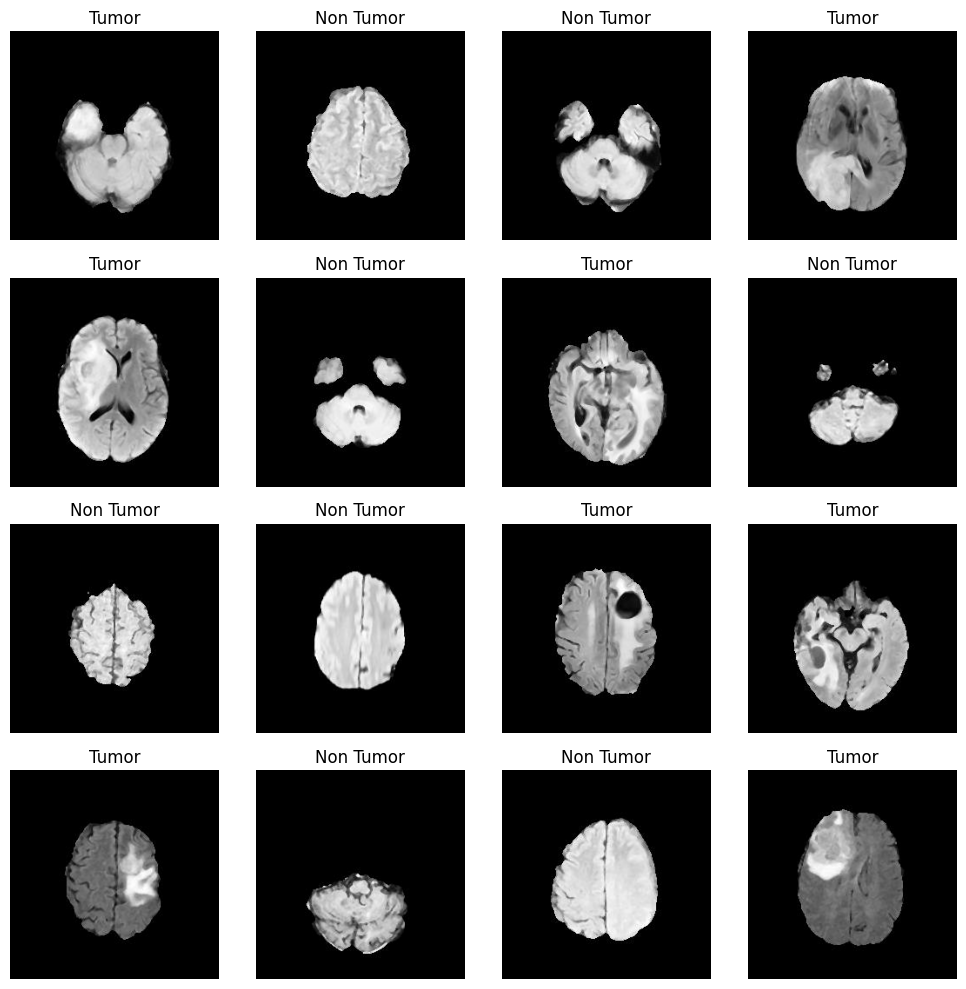

In [ ]:
# visualizing the data
label_to_class = {0:"Non Tumor", 1:"Tumor"}
def plot_images(images, labels):
    num_images = len(images)
    num_rows = 4
    num_cols = 4

    plt.figure(figsize=(10, 10))
    for i in range(min(num_images, num_rows * num_cols)):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Iterate over the first batch of the dataset
for batch_images, batch_labels in train_dataset.take(1):
    # Convert batch labels to class names using the provided dictionary
    class_names = [label_to_class[label.numpy()] for label in batch_labels]

    # Plot the images in a 4x4 grid
    plot_images(batch_images.numpy(), class_names)

### 1. CNN model from scratch

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# flatten the output and add Dense layers for classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 119, 119, 32)      0         
 D)                                                              
                                                                 
 conv2d_29 (Conv2D)          (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 58, 58, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 200704)            0

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, epochs=10)

# evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc}")

Epoch 1/10
48/48 [==============================] - 9s 122ms/step - loss: 0.4960 - accuracy: 0.7783
Epoch 2/10
48/48 [==============================] - 5s 95ms/step - loss: 0.3814 - accuracy: 0.8421
Epoch 3/10
48/48 [==============================] - 4s 86ms/step - loss: 0.3161 - accuracy: 0.8644
Epoch 4/10
48/48 [==============================] - 5s 105ms/step - loss: 0.2283 - accuracy: 0.9113
Epoch 5/10
48/48 [==============================] - 7s 136ms/step - loss: 0.1598 - accuracy: 0.9362
Epoch 6/10
48/48 [==============================] - 8s 169ms/step - loss: 0.0872 - accuracy: 0.9671
Epoch 7/10
48/48 [==============================] - 6s 113ms/step - loss: 0.0695 - accuracy: 0.9744
Epoch 8/10
48/48 [==============================] - 5s 107ms/step - loss: 0.1253 - accuracy: 0.9521
Epoch 9/10
48/48 [==============================] - 5s 97ms/step - loss: 0.0768 - accuracy: 0.9727
Epoch 10/10
12/12 [==============================] - 3s 150ms/step - loss: 0.3222 - accuracy: 0.9097
Te

In [ ]:
# finding the evaluation metrices
predictions = model.predict(test_dataset)
predictions = [1 if i>0.5 else 0 for i in predictions]

y_true = []
for _, y in test_dataset.as_numpy_iterator():
    y_true.append(y)

evaluate_model(np.concatenate(y_true, axis=0), predictions, "CNN model from scratch")

12/12 [==============================] - 1s 114ms/step
+------------------------+
| CNN model from scratch |
+---------------+--------+
|     Metric    | Value  |
+---------------+--------+
|    Accuracy   | 91.0%  |
|   Precision   | 89.4%  |
|     Recall    | 90.5%  |
|    F1 Score   | 90.0%  |
|  Sensitivity  | 90.5%  |
|    AUC-ROC    | 90.9%  |
+---------------+--------+


### 2. Transfer Learning

In [ ]:
base_model = tf.keras.applications.ResNet50(weights='imagenet',
                                            include_top=False,
                                            input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the layers of the pre-trained model except last 5
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained base model
model_resnet = tf.keras.models.Sequential()
model_resnet.add(base_model)
model_resnet.add(layers.Flatten())
model_resnet.add(layers.Dense(256, activation='relu'))
model_resnet.add(layers.Dropout(0.2))
model_resnet.add(layers.Dense(1, activation='sigmoid'))

model_resnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               33554688  
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 57142657 (217.98 MB)
Trainable params: 33554945 (128.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
# Compile the model
model_resnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history1 = model_resnet.fit(train_dataset, epochs=20)

Epoch 1/20
48/48 [==============================] - 14s 207ms/step - loss: 4.5814 - accuracy: 0.5636
Epoch 2/20
48/48 [==============================] - 10s 206ms/step - loss: 0.6730 - accuracy: 0.5530
Epoch 3/20
48/48 [==============================] - 10s 204ms/step - loss: 0.6163 - accuracy: 0.5583
Epoch 4/20
48/48 [==============================] - 10s 210ms/step - loss: 0.5707 - accuracy: 0.6916
Epoch 5/20
48/48 [==============================] - 10s 202ms/step - loss: 0.5564 - accuracy: 0.7212
Epoch 6/20
48/48 [==============================] - 10s 207ms/step - loss: 0.5451 - accuracy: 0.7368
Epoch 7/20
48/48 [==============================] - 10s 210ms/step - loss: 0.5358 - accuracy: 0.7468
Epoch 8/20
48/48 [==============================] - 10s 207ms/step - loss: 0.5296 - accuracy: 0.7541
Epoch 9/20
48/48 [==============================] - 10s 215ms/step - loss: 0.5196 - accuracy: 0.7630
Epoch 10/20
48/48 [==============================] - 10s 212ms/step - loss: 0.5184 - accura

In [ ]:
# evaluate the model on the test set
test_loss, test_acc = model_resnet.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc}")

12/12 [==============================] - 4s 203ms/step - loss: 0.4481 - accuracy: 0.8552
Test Accuracy: 0.8552457094192505


In [ ]:
# finding the evlauation metrices
predictions = model_resnet.predict(test_dataset)
predictions = [1 if i>0.5 else 0 for i in predictions]

y_true = []
for _, y in test_dataset.as_numpy_iterator():
    y_true.append(y)

evaluate_model(np.concatenate(y_true, axis=0), predictions, "ResNet - Transfer Learning ")

12/12 [==============================] - 4s 207ms/step
+-----------------------------+
| ResNet - Transfer Learning  |
+------------------+----------+
|      Metric      |  Value   |
+------------------+----------+
|     Accuracy     |  85.5%   |
|    Precision     |  80.5%   |
|      Recall      |  89.3%   |
|     F1 Score     |  84.7%   |
|   Sensitivity    |  89.3%   |
|     AUC-ROC      |  85.9%   |
+------------------+----------+


## Machine Learning + Deep Learning

In [ ]:
# ml
preds_model1 = forest.predict_proba(X_train)[:, 1]

# dl
preds_model2 = model.predict(train_dataset)

ensemble_data =  np.column_stack((preds_model1, preds_model2))

# training logistic regression model
lr_ensemble = LogisticRegression(max_iter=10000)
lr_ensemble.fit(ensemble_data, y_train)

48/48 [==============================] - 6s 115ms/step


LogisticRegression(max_iter=10000)

In [ ]:
# ml predictions
preds_model1 = forest.predict_proba(X_test)[:, 1]

# dl predictions
preds_model2 = model.predict(test_dataset)

ensemble_data_test =  np.column_stack((preds_model1, preds_model2))

12/12 [==============================] - 1s 77ms/step


In [ ]:
predictions = lr_ensemble.predict(ensemble_data_test)
evaluate_model(y_test, predictions, "ML + DL ensemble model")

+------------------------+
| ML + DL ensemble model |
+---------------+--------+
|     Metric    | Value  |
+---------------+--------+
|    Accuracy   | 94.7%  |
|   Precision   | 93.5%  |
|     Recall    | 94.7%  |
|    F1 Score   | 94.1%  |
|  Sensitivity  | 94.7%  |
|    AUC-ROC    | 94.7%  |
+---------------+--------+


The performance is good but not better than ML model